# Feature Importance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

import os
import time
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2

## 1. Import data and model from Deep Learning notebook

model detail:
```
model = Sequential([
        Input(shape=(sequence_length, X_train_seq.shape[2])),
        LSTM(64, return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(128),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(num_classes, activation='softmax')
    ])
```

In [ ]:
local_file_path = "crime_df_debug_seq.pkl"
file_id = "16kFTSS7FSStw9E8cN_3wplfDq9rZpDWg"

if not os.path.exists(local_file_path):
    print("File not found, downloading...")
    import gdown
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, local_file_path, quiet=False)
else:
    print("File found, loading...")

crime_df_debug_seq = pd.read_pickle(local_file_path)
print(crime_df_debug_seq['X_sequences'].shape)
print(crime_df_debug_seq['y_sequences'].shape)

X_sequences = crime_df_debug_seq['X_sequences']
y_sequences = crime_df_debug_seq['y_sequences']

File not found, downloading...


Downloading...
From: https://drive.google.com/uc?id=16kFTSS7FSStw9E8cN_3wplfDq9rZpDWg
To: /content/crime_df_debug_seq.pkl
100%|██████████| 60.1M/60.1M [00:00<00:00, 165MB/s]


(28361, 24, 11)
(28361,)


In [ ]:
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=534, stratify=y_sequences)

# one-hot encode
num_classes = 11
y_train_categorical = to_categorical(y_train_seq, num_classes)
y_test_categorical = to_categorical(y_test_seq, num_classes)

In [ ]:
local_file_path = "model.keras"
file_id = "1SqI-Dh-krgvtMw1sml-OT9xcoTjuZJcr"

if not os.path.exists(local_file_path):
    print("File not found, downloading...")
    import gdown
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, local_file_path, quiet=False)
else:
    print("File found, loading...")

model = load_model('model.keras')
print(model.summary())

File found, loading...


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 24, 64)              │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,024 (1000.10 KB)

 Trainable params: 127,755 (499.04 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 127,757 (499.05 KB)

None


## 2. Permutation

178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29

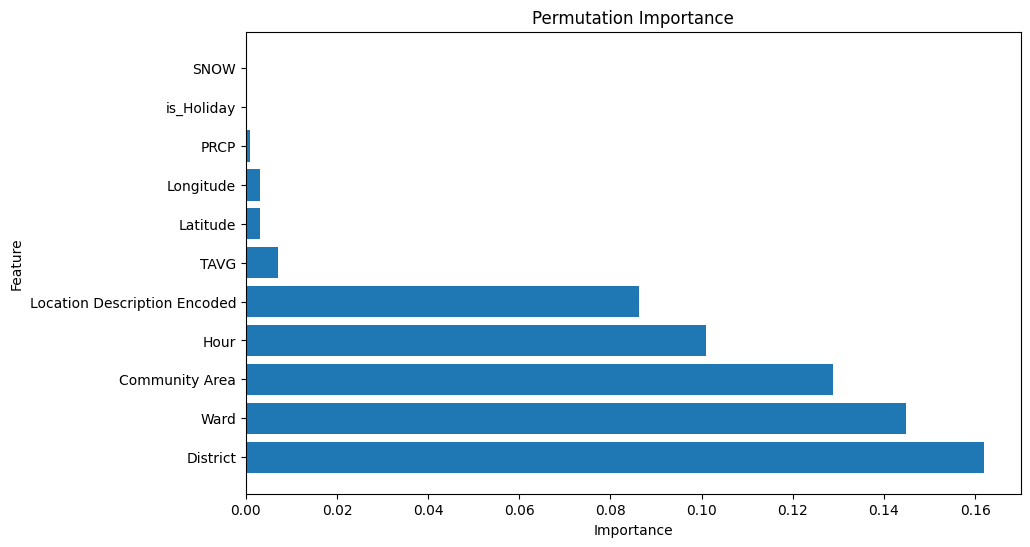

In [ ]:
feature_names = ['Hour', 'is_Holiday', 'PRCP', 'SNOW', 'TAVG', 'Latitude', 'Longitude',
                 'District', 'Ward', 'Community Area', 'Location Description Encoded']

def compute_permutation_importance(model, X, y, metric, n_repeats=5):
    baseline_metric = metric(y, np.argmax(model.predict(X), axis=1))
    feature_importances = np.zeros(X.shape[2])

    for i in range(X.shape[2]):
        metric_degrades = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            for j in range(X.shape[0]):
                np.random.shuffle(X_permuted[j, :, i])
            permuted_metric = metric(y, np.argmax(model.predict(X_permuted), axis=1))
            metric_degrades.append(baseline_metric - permuted_metric)
        feature_importances[i] = np.mean(metric_degrades)
    return feature_importances

def accuracy_metric(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

with tf.device('/GPU:0'):
    feature_importances = compute_permutation_importance(model, X_test_seq, y_test_seq, accuracy_metric)

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance')
plt.show()



### Conclusion

The Permutation Importance results indicate that geographic features, such as District, Ward, and Community Area, are the most influential predictors of crime type. Additionally, Location Description Encoded, which describes the type of location (e.g., residential or commercial), and Hour (time of day) also play significant roles, reflecting logical correlations such as different crime types being more prevalent at certain times or locations. Weather-related features like TAVG (average temperature), PRCP (precipitation), and SNOW (snowfall), as well as is_Holiday, appear to have minimal impact, suggesting that these factors might be less relevant in predicting the types of crimes in the dataset. These findings align with common-sense expectations and underscore the importance of spatial and temporal data in crime analysis, providing actionable insights for targeted crime prevention strategies.